# E7-8. 나랑 닮은 연예인을 찾아보자       

## Step 1. 사진 모으기 
1. 내 사진 찍기    

* 내 사진 2장 준비    
* 내 사진 끼리 벡터 거리 구해보기(닮았음을 확인 할 수 있음)   
* 거리가 멀게 나온다면 왜 그럴까 생각해보기   
   
2. 비교할 연예인 사진 모으기   
* 많을 수록 나와 더 닮은 연예인을 찾을 가능성이 높아짐   


[(724, 1788, 1682, 830)]


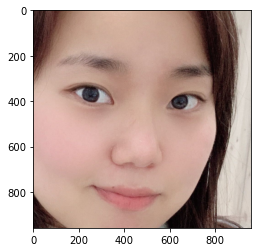

In [25]:
#내 사진끼리 백터 거리 구하기 
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images2/김가영.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

## Step2. 얼굴 영역 자르기   
* get_gropped_face(iamge_file) 통해서 얼굴 이미지 자르기.   
* 자른 이미지는 PIL의 Image.fromarray 통해서 PIL Image로 변환 후 저장하기.  

In [26]:
import face_recognition
import os

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

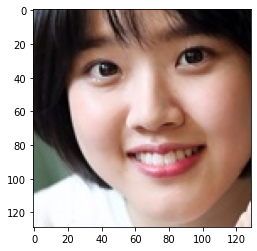

In [27]:
#자른 이미지 확인 
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images2/김향기.jpg'


cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)


In [28]:
#PIL PImage.fromarray 쓰는거 
from PIL import Image
pillow_image = Image.fromarray(cropped_face)
pillow_image.save(path_to_save)
path_to_save = path('/home/ssac8/aiffel/face_embedding/images2/cropped')

NameError: name 'path_to_save' is not defined

## Step3. 얼굴 영역 임베딩 추출하기   
* face_recognition 사용하여 이미지 불러오기 -> 임베딩 추출 
* 다른 사람의 임베딩 구분할 수 있게 따로 저장할 것.   
   
    * def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수   
    * def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [29]:
#파일안에 어떤 사진들이 있는지 봐보기 
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images2'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['리지.jpg', '소희.jpg', '김가영.jpg', '니엘.jpg', '김가영2.jpg', '김향기.jpg', '임수정.jpg', '김숙.jpg']


In [30]:
#내 사진에 대한 임베딩 벡터 구하기
image_file = os.path.join(dir_path, '김가영.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.06311122,  0.04531981,  0.03855234, -0.10413819, -0.10889078,
        -0.02520561, -0.09503134, -0.11504178,  0.17236856, -0.20194237,
         0.16422457, -0.05617928, -0.23583202, -0.04264095, -0.05374347,
         0.20599994, -0.17679165, -0.15529446, -0.00890102,  0.01766317,
         0.08515435,  0.0494037 , -0.01368999,  0.02450314, -0.19118589,
        -0.31773588, -0.14744079, -0.02738423, -0.09937713, -0.0411968 ,
        -0.02829549,  0.12647355, -0.12415819,  0.02861953,  0.01681004,
         0.09670063,  0.0191729 , -0.10127061,  0.16863686,  0.03267518,
        -0.29656538,  0.01991612,  0.068482  ,  0.25046831,  0.14554682,
        -0.08800455,  0.0180748 , -0.11195433,  0.10688908, -0.18737352,
        -0.03217259,  0.14971012,  0.02401315,  0.07209907,  0.03974317,
        -0.06091516,  0.04881435,  0.10048103, -0.09312159, -0.01381339,
         0.08334352, -0.11570948, -0.0431458 , -0.11491497,  0.18633531,
         0.08641167, -0.14631905, -0.19179122,  0.1

In [38]:
#dir_path를 지정함으로써 파일 안 전체 파일들에 대한 임베딩 벡터 구하기 

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [39]:
#함수가 잘 만들어졌는지 확인 
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['니엘']

array([-0.10396064,  0.01013409,  0.07572344, -0.11256237, -0.13028242,
       -0.03271052, -0.11080068, -0.09925704,  0.08230433, -0.12704042,
        0.2037354 , -0.07505792, -0.17416239, -0.04795289, -0.06951261,
        0.22723809, -0.10652637, -0.1744464 , -0.01735765,  0.02282945,
        0.07745151,  0.00892702, -0.01456963,  0.07834791, -0.13151094,
       -0.28459385, -0.15662777, -0.02670319, -0.09719063, -0.07189913,
       -0.07339854,  0.05037686, -0.18976797,  0.0318639 ,  0.02087747,
        0.15659766,  0.06389386, -0.06821347,  0.09290233,  0.06290943,
       -0.28504741,  0.09417057,  0.08654112,  0.19510607,  0.17760342,
        0.02061008,  0.02726946, -0.12571126,  0.06756876, -0.14981647,
        0.07169214,  0.11908159,  0.09607573,  0.01828445, -0.03694506,
       -0.12567589,  0.00576685,  0.13944459, -0.14532787,  0.02105038,
        0.07678366, -0.08006375, -0.04890208, -0.14810944,  0.18068579,
        0.17136842, -0.13516641, -0.25861093,  0.12585057, -0.15

## Step4. 모든 연예인들과 비교하기 
내 사진을 포함에서 모든 임베딩 벡터를 다 뽑았습니다.   
그럼 이제 가장 나와 비슷하게 닯은 연예인 사진을 get_nearest_face(name, top=5)를 통해서 뽑아봅시다. 

In [40]:
#내 사진들과의 간격 확인 
import numpy as np
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('김가영', '김가영2')

0.21553784371410128

In [41]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('김가영')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [42]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('김가영',
  array([-0.06311122,  0.04531981,  0.03855234, -0.10413819, -0.10889078,
         -0.02520561, -0.09503134, -0.11504178,  0.17236856, -0.20194237,
          0.16422457, -0.05617928, -0.23583202, -0.04264095, -0.05374347,
          0.20599994, -0.17679165, -0.15529446, -0.00890102,  0.01766317,
          0.08515435,  0.0494037 , -0.01368999,  0.02450314, -0.19118589,
         -0.31773588, -0.14744079, -0.02738423, -0.09937713, -0.0411968 ,
         -0.02829549,  0.12647355, -0.12415819,  0.02861953,  0.01681004,
          0.09670063,  0.0191729 , -0.10127061,  0.16863686,  0.03267518,
         -0.29656538,  0.01991612,  0.068482  ,  0.25046831,  0.14554682,
         -0.08800455,  0.0180748 , -0.11195433,  0.10688908, -0.18737352,
         -0.03217259,  0.14971012,  0.02401315,  0.07209907,  0.03974317,
         -0.06091516,  0.04881435,  0.10048103, -0.09312159, -0.01381339,
          0.08334352, -0.11570948, -0.0431458 , -0.11491497,  0.18633531,
          0.08641167, -0.1463

In [46]:
def get_nearest_face(name, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+2):
        if i == 0 :   # 내 사진이 총 2개가 있으므로, 2개까지 패스 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [47]:
# 당신과 가장 닮은 사람은 누굴까요?
get_nearest_face('김가영2')

순위 1 : 이름(김가영), 거리(0.21553784371410128)
순위 2 : 이름(임수정), 거리(0.38650220051734685)
순위 3 : 이름(김향기), 거리(0.406092908909963)
순위 4 : 이름(소희), 거리(0.4679628013372185)
순위 5 : 이름(리지), 거리(0.5325001644976187)
순위 6 : 이름(김숙), 거리(0.5345611748276566)
순위 7 : 이름(니엘), 거리(0.5370778569911214)


---


## Step5. 다양한 재미있는 시각화 시도해보기.    
#### Q. 나는 엄마를 닮았을까? 아빠를 닮았을까?? 


In [89]:
#가족들 사진 있는 폴더로 설정 후 가지고 오기 
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images3'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['엄마.jpg', '김가영2.jpg', '김가영3.jpg', '아빠.jpg']


In [90]:
#얼굴 부분으로 이미지 자르기 
import face_recognition
import os

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

In [76]:
#엄마 사진에 대한 임베딩 벡터 구하기
image_file = os.path.join(dir_path, '엄마.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.09207655,  0.045671  ,  0.08143009, -0.11476567, -0.101837  ,
        -0.06721021, -0.05556542, -0.10783255,  0.14754149, -0.14113662,
         0.22419639, -0.14362481, -0.24400926, -0.01301067, -0.09040803,
         0.24798617, -0.18458505, -0.09894351, -0.11208238,  0.04783371,
         0.06232903,  0.04983331, -0.06652649,  0.00689864, -0.06309606,
        -0.35714784, -0.11445439, -0.03940127, -0.06620862, -0.05030734,
        -0.03484584,  0.07229664, -0.15652841, -0.05408403,  0.05902409,
         0.08304165, -0.01502834, -0.1428864 ,  0.1026445 ,  0.01611117,
        -0.28623828,  0.04611761,  0.11865442,  0.20462111,  0.1961896 ,
         0.03719329, -0.01653429, -0.2135257 ,  0.16751911, -0.20107095,
        -0.03082888,  0.07682978,  0.06885254,  0.05778447,  0.07371197,
        -0.15204129,  0.05336471,  0.12145697, -0.18326072, -0.03666272,
         0.08627155, -0.074196  , -0.03075832, -0.13406584,  0.20431085,
         0.10361277, -0.13348283, -0.15037966,  0.1

In [91]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [92]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['엄마']

array([-0.09207655,  0.045671  ,  0.08143009, -0.11476567, -0.101837  ,
       -0.06721021, -0.05556542, -0.10783255,  0.14754149, -0.14113662,
        0.22419639, -0.14362481, -0.24400926, -0.01301067, -0.09040803,
        0.24798617, -0.18458505, -0.09894351, -0.11208238,  0.04783371,
        0.06232903,  0.04983331, -0.06652649,  0.00689864, -0.06309606,
       -0.35714784, -0.11445439, -0.03940127, -0.06620862, -0.05030734,
       -0.03484584,  0.07229664, -0.15652841, -0.05408403,  0.05902409,
        0.08304165, -0.01502834, -0.1428864 ,  0.1026445 ,  0.01611117,
       -0.28623828,  0.04611761,  0.11865442,  0.20462111,  0.1961896 ,
        0.03719329, -0.01653429, -0.2135257 ,  0.16751911, -0.20107095,
       -0.03082888,  0.07682978,  0.06885254,  0.05778447,  0.07371197,
       -0.15204129,  0.05336471,  0.12145697, -0.18326072, -0.03666272,
        0.08627155, -0.074196  , -0.03075832, -0.13406584,  0.20431085,
        0.10361277, -0.13348283, -0.15037966,  0.18211456, -0.12

In [93]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('엄마')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [94]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('엄마',
  array([-0.09207655,  0.045671  ,  0.08143009, -0.11476567, -0.101837  ,
         -0.06721021, -0.05556542, -0.10783255,  0.14754149, -0.14113662,
          0.22419639, -0.14362481, -0.24400926, -0.01301067, -0.09040803,
          0.24798617, -0.18458505, -0.09894351, -0.11208238,  0.04783371,
          0.06232903,  0.04983331, -0.06652649,  0.00689864, -0.06309606,
         -0.35714784, -0.11445439, -0.03940127, -0.06620862, -0.05030734,
         -0.03484584,  0.07229664, -0.15652841, -0.05408403,  0.05902409,
          0.08304165, -0.01502834, -0.1428864 ,  0.1026445 ,  0.01611117,
         -0.28623828,  0.04611761,  0.11865442,  0.20462111,  0.1961896 ,
          0.03719329, -0.01653429, -0.2135257 ,  0.16751911, -0.20107095,
         -0.03082888,  0.07682978,  0.06885254,  0.05778447,  0.07371197,
         -0.15204129,  0.05336471,  0.12145697, -0.18326072, -0.03666272,
          0.08627155, -0.074196  , -0.03075832, -0.13406584,  0.20431085,
          0.10361277, -0.13348

In [104]:
def get_nearest_face(name, top=3):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [106]:
# 가족 중 나와 가장 닮은 사람은 누굴까요?
get_nearest_face('김가영2')

순위 1 : 이름(김가영3), 거리(0.2652615779431401)
순위 2 : 이름(엄마), 거리(0.4897695718788077)
순위 3 : 이름(아빠), 거리(0.6065170701646919)
